In [1]:
import pandas as pd 
import geopandas 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import contextily as ctx

## Loading Data

In [2]:
df = geopandas.read_file("data.shp")
df.head(5)

,OBJECTID,flood,elveation,slope,Distance_R,Precipitat,geometry
0,1,1,12.000000,1.292534,100.0,466.6,POINT (94573.298 94941.141)
1,2,0,26.046366,2.671414,75.0,424.4,POINT (97083.818 95085.780)
2,3,1,10.817870,2.808787,40.0,424.4,POINT (94180.706 96325.543)
3,4,1,9.000000,0.000000,78.0,424.4,POINT (93478.174 96563.164)
4,5,1,19.637095,1.798857,57.0,424.4,POINT (95885.380 96749.128)


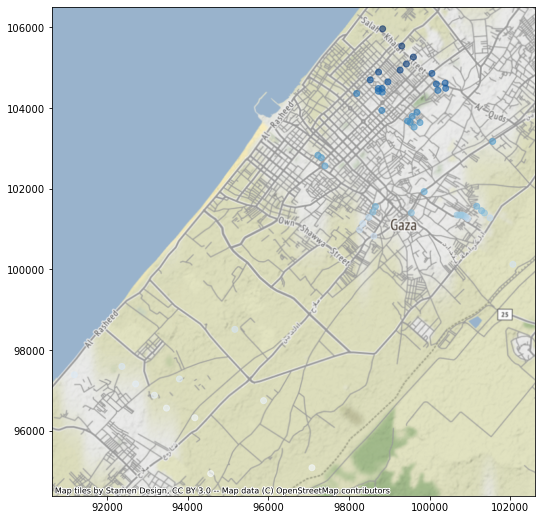

In [3]:
fig, ax = plt.subplots(figsize=(9,9))
df.plot(ax=ax, alpha = 0.6, cmap='Blues')
ctx.add_basemap(ax, crs=df.crs.to_string())

## Split training data further into training and Test


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
y = df['flood']
x = df[["Distance_R" , "elveation" , "slope", "Precipitat"]]
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size = 0.30, random_state =55)
X_train

,Distance_R,elveation,slope,Precipitat
1,75.0,26.046366,2.671414,424.40
25,652.0,34.376950,7.949885,512.25
50,38.0,23.000000,0.000000,590.50
21,700.0,56.108719,9.535309,512.25
40,30.0,23.000000,0.000000,590.50
20,600.0,45.323214,2.902263,512.25
44,880.0,59.116174,5.756005,590.50
9,57.0,8.000000,0.000000,424.40
38,52.0,23.000000,0.000000,590.50
45,43.0,23.000000,0.000000,590.50


# Exploring the data

In [6]:
df[["flood" , "elveation" , "slope", "Precipitat"]].describe()

,flood,elveation,slope,Precipitat
count,60.000000,60.000000,60.000000,60.000000
mean,0.533333,35.678764,3.360172,533.331667
std,0.503098,17.744235,2.977689,57.991026
min,0.000000,8.000000,0.000000,424.400000
25%,0.000000,23.000000,0.961600,512.250000
50%,1.000000,32.598135,2.855525,517.725000
75%,1.000000,48.071736,5.780210,590.500000
max,1.000000,75.243634,11.897410,590.500000


1    32
0    28
Name: flood, dtype: int64


<AxesSubplot:title={'center':'Flood occurrence and non-occurrence data'}>

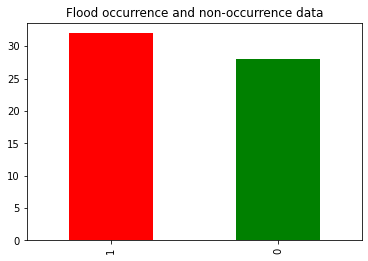

In [7]:
print (df.flood.value_counts())
df.flood.value_counts ().plot (kind="bar", color=["red", "green"], title= 'Flood occurrence and non-occurrence data')

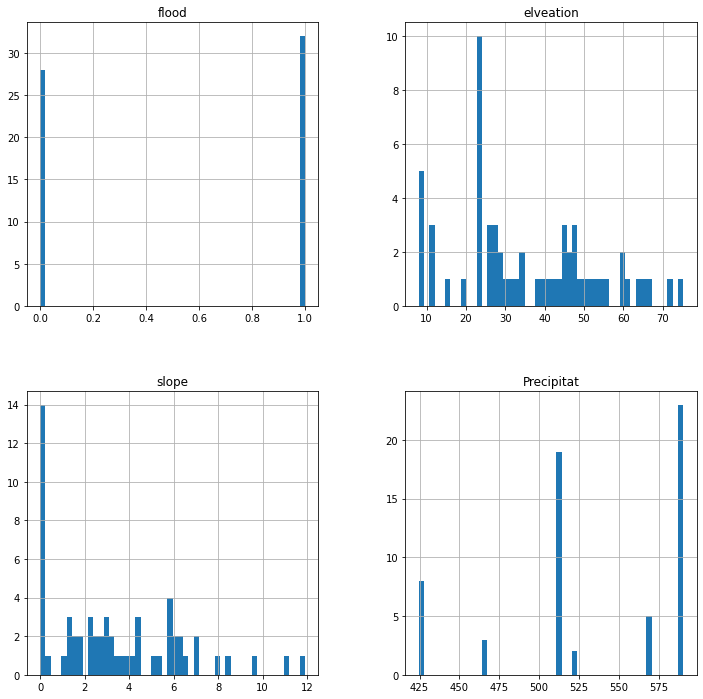

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df[["flood" , "elveation" , "slope", "Precipitat"]].hist(bins=50, figsize=(12,12))
plt.show()

In [9]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    60 non-null     int64   
 1   flood       60 non-null     int64   
 2   elveation   60 non-null     float64 
 3   slope       60 non-null     float64 
 4   Distance_R  60 non-null     float64 
 5   Precipitat  60 non-null     float64 
 6   geometry    60 non-null     geometry
dtypes: float64(4), geometry(1), int64(2)
memory usage: 3.4 KB


In [10]:
df.isna().sum()

OBJECTID      0
flood         0
elveation     0
slope         0
Distance_R    0
Precipitat    0
geometry      0
dtype: int64

# Preparing the Data

# Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
ds_model = DecisionTreeClassifier(random_state=0)

In [13]:
ds_model.fit(X_train,y_train) 

DecisionTreeClassifier(random_state=0)

In [14]:
y_pred = ds_model.predict(X_test)

In [15]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy for model: %.2f" % (accuracy_score(y_test, y_pred)*100))

Accuracy for model: 72.22


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [18]:
cm1 = confusion_matrix(y_test, y_pred)

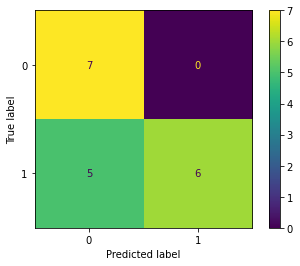

In [19]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
cm_disp.plot()

# xgboost

In [20]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report #prediction and Classification Report

In [21]:
model= xgb.XGBClassifier()
train_model = model.fit(X_train, y_train)

[23:07:03] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\97059\anaconda3\envs\mlgiss\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [22]:
y_pred = train_model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
print("Accuracy for model: %.2f" % (accuracy_score(y_test, y_pred)*100))

Accuracy for model: 88.89


In [24]:
cm1 = confusion_matrix(y_test, y_pred)

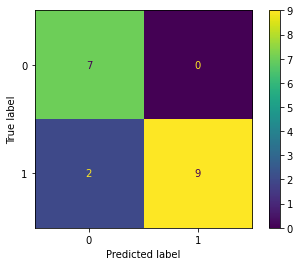

In [25]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
cm_disp.plot()

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf_model = RandomForestClassifier(random_state=0)

In [28]:
rf_model.fit(X_train,y_train) 

RandomForestClassifier(random_state=0)

In [29]:
y_pred = rf_model.predict(X_test)

In [30]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
print("Accuracy for model: %.2f" % (accuracy_score(y_test, y_pred)*100))

Accuracy for model: 94.44


In [32]:
cm1 = confusion_matrix(y_test, y_pred)

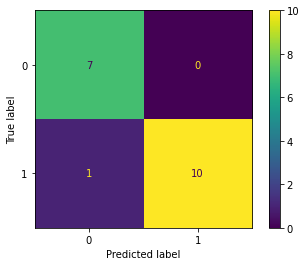

In [33]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
cm_disp.plot()

# Sample

In [34]:
Sample = geopandas.read_file("Sample.shp")
datanew=Sample[["Distance_R" , "elveation" , "slope", "Precipitat"]]
datanew

,Distance_R,elveation,slope,Precipitat
0,730.0,37.074029,5.754520,424.40
1,1000.0,54.844981,3.917561,424.40
2,200.0,9.814543,1.114918,424.40
3,1000.0,50.464706,7.316616,424.40
4,300.0,28.586240,1.292417,424.40
5,200.0,30.088753,2.898544,424.40
6,1200.0,51.919829,3.421623,512.25
7,400.0,13.048523,3.055299,424.40
8,600.0,30.100997,1.991433,424.40
9,400.0,49.213720,4.336002,512.25


In [35]:
y_pred = rf_model.predict(datanew)

In [36]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1],
      dtype=int64)

In [37]:
y_pred_dataframe = pd.DataFrame(y_pred,columns = ['Column_A'])
datanew["Target"]=y_pred_dataframe
datanew

C:\Users\97059\AppData\Local\Temp/ipykernel_22108/2143972997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew["Target"]=y_pred_dataframe


,Distance_R,elveation,slope,Precipitat,Target
0,730.0,37.074029,5.754520,424.40,0
1,1000.0,54.844981,3.917561,424.40,0
2,200.0,9.814543,1.114918,424.40,1
3,1000.0,50.464706,7.316616,424.40,0
4,300.0,28.586240,1.292417,424.40,1
5,200.0,30.088753,2.898544,424.40,1
6,1200.0,51.919829,3.421623,512.25,0
7,400.0,13.048523,3.055299,424.40,1
8,600.0,30.100997,1.991433,424.40,1
9,400.0,49.213720,4.336002,512.25,0


1    10
0     9
Name: Target, dtype: int64


<AxesSubplot:title={'center':'Flood occurrence and non-occurrence data'}>

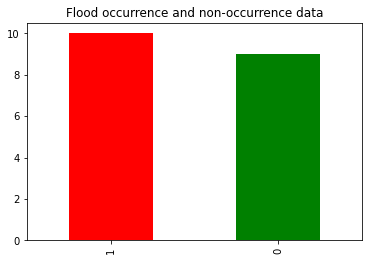

In [38]:
print (datanew.Target.value_counts())
datanew.Target.value_counts ().plot (kind="bar", color=["red", "green"], title= 'Flood occurrence and non-occurrence data')

In [39]:
datanew.to_csv('Output.csv') 